In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='latin1')


In [4]:
df

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8
...,...,...,...,...,...,...,...,...,...,...,...
176,177,Belize,"4,001",0%,166.5,6.68,1.76,373.09,"4,436",664,4
177,178,Niue,51,0%,484.4,11.43,3.02,638.73,"15,586","1,364",3
178,179,Saint Pierre & Miquelon,660,0%,1705.1,8.27,2.19,462.13,"34,900","4,220",2
179,180,Montserrat,400,0%,1231.1,4.57,1.21,255.07,"12,589","2,755",2


In [5]:
# setting the notebook to print all the rows
pd.set_option('display.max_rows', None)
column_names = df.columns
print(column_names)

Index(['S#', 'Country', 'Daily Oil Consumption (Barrels)', 'World Share',
       'Yearly Gallons Per Capita', 'Price Per Gallon (USD)',
       'Price Per Liter (USD)', 'Price Per Liter (PKR)',
       'GDP Per Capita ( USD )', 'Gallons GDP Per Capita Can Buy',
       'xTimes Yearly Gallons Per Capita Buy'],
      dtype='object')


## Visualization: Top 10 Countries with Highest Daily Oil Consumption

In [6]:
# removing commas from the "Daily Oil Consumption (Barrels)" column and converting the datatype to numeric
df["Daily Oil Consumption (Barrels)"] = df["Daily Oil Consumption (Barrels)"].str.replace(',', '').astype(float)

# sorting the data by daily oil consumption in descending order to get the top 10 countries that use most oil daily
data_sorted = df.sort_values(by="Daily Oil Consumption (Barrels)", ascending=False)

top_10_data = data_sorted.head(10)

In [7]:
# extracting the countries names and their daily oil consumption
countries = top_10_data["Country"]
oil_consumption = top_10_data["Daily Oil Consumption (Barrels)"]

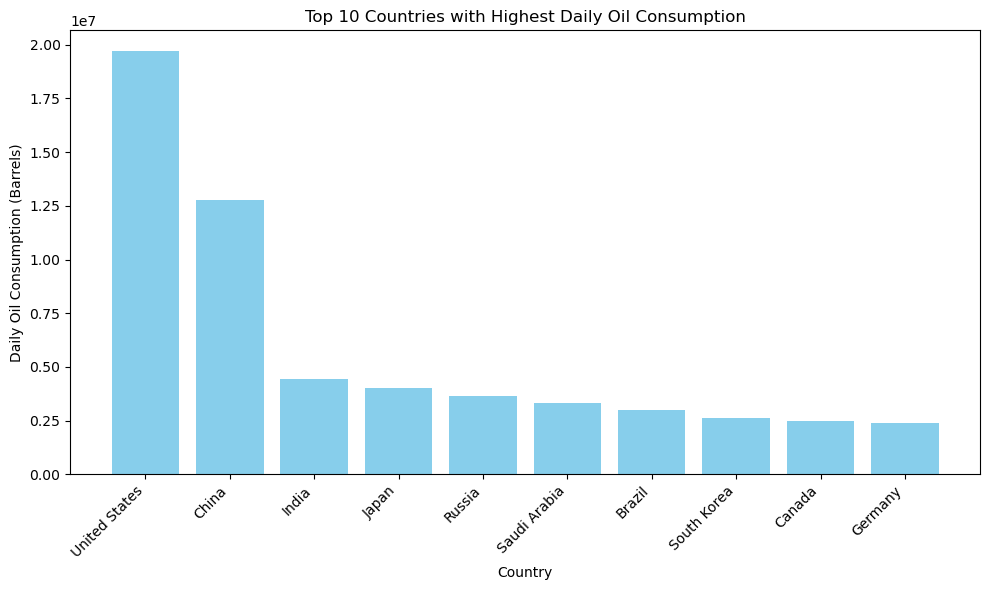

In [8]:
# creating a vertical bar plot using matplotlib
# also setting the size, width:10,height:6
plt.figure(figsize=(10, 6)) 

plt.bar(countries, oil_consumption, color='skyblue')

# giving the names to be shown on x_axis and y-axis
plt.title("Top 10 Countries with Highest Daily Oil Consumption")
plt.xlabel("Country")
plt.ylabel("Daily Oil Consumption (Barrels)")
plt.xticks(rotation=45, ha='right')  
# this code will adjust the spacing between elements
plt.tight_layout()  

plt.show()

## World Share of Oil Consumption for Major Asian Subcontinent Countries

In [ ]:
asian_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan', 'Maldives']

# filtering data for asian countries
asian_data = df[df['Country'].isin(asian_countries)]
# removing the % sign and changing the datatype to numeric so it can be used in the chart
asian_data['World Share'] = asian_data['World Share'].str.rstrip('%').astype(float)

In [10]:
# filtering out those countries which has share greater than 1%
major_countries = asian_data[asian_data['World Share'] >= 1]

In [ ]:
# combining the remaining countries into "other", as they have very small share
# for better visualizing
other_share = asian_data[asian_data['World Share'] < 1]['World Share'].sum()
major_countries = major_countries.append({'Country': 'Other', 'World Share': other_share}, ignore_index=True)


In [12]:
#sorting those major countries in descinding order e.g. "india---pakistan--"
major_countries = major_countries.sort_values(by='World Share', ascending=False)

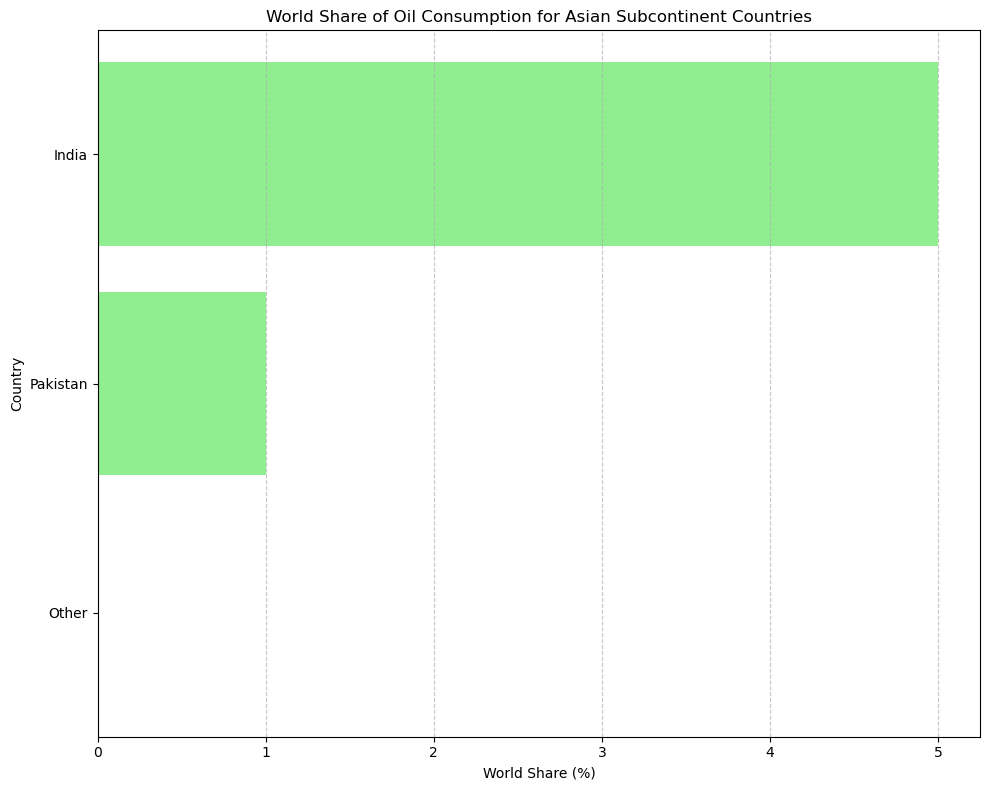

In [13]:
# creating a horizantal bar chart
plt.figure(figsize=(10, 8))
plt.barh(major_countries['Country'], major_countries['World Share'], color='lightgreen')
plt.xlabel('World Share (%)')
plt.ylabel('Country')
plt.title('World Share of Oil Consumption for Asian Subcontinent Countries')
plt.gca().invert_yaxis()
# adding grid lines for better visibility
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.tight_layout()
plt.show()

## Comparison of Oil Prices per Liter (Top 20 Countries)

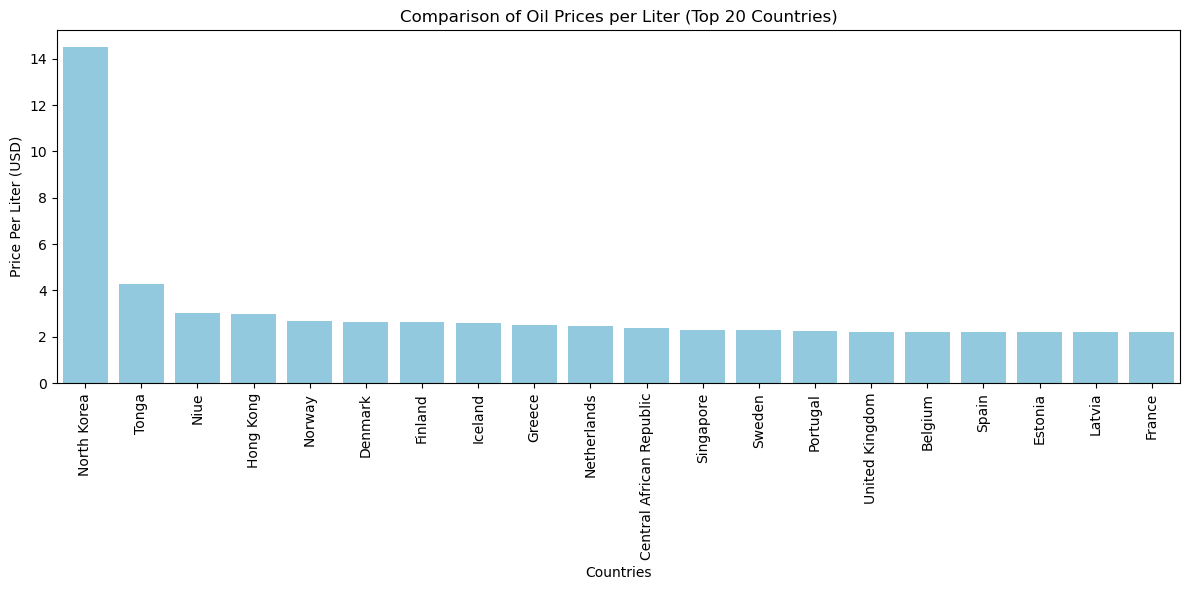

In [14]:
# sorting the data by price per gallon in descending order
# using seaborn library
top_20_countries = df.nlargest(20, 'Price Per Gallon (USD)')

# creating a bar chart
plt.figure(figsize=(12, 6))
sb.barplot(data=top_20_countries, x='Country', y='Price Per Liter (USD)', color='skyblue')
plt.title('Comparison of Oil Prices per Liter (Top 20 Countries)')
plt.xlabel('Countries')
plt.ylabel('Price Per Liter (USD)')
plt.xticks(rotation=90) 
# adjusting the layout
plt.tight_layout() 
plt.show()

## Same thing using a bar plot

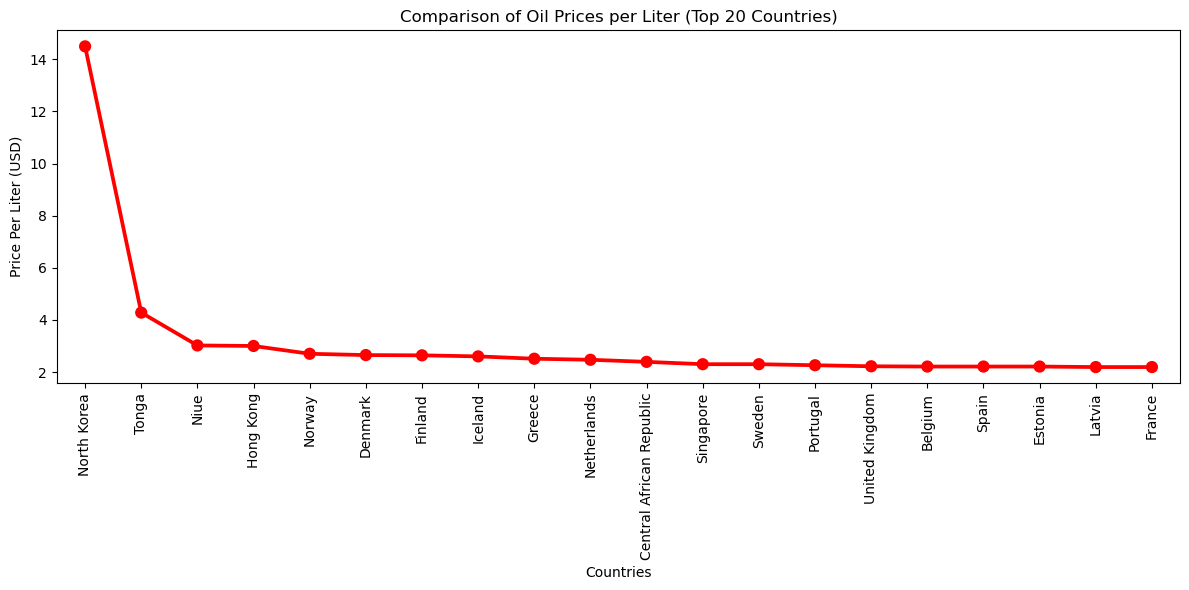

In [15]:
# creating the point chart
#using the seaborn library
plt.figure(figsize=(12, 6))
sb.pointplot(data=top_20_countries, x='Country', y='Price Per Liter (USD)', color='red', linestyles='-', markers='o')
plt.title('Comparison of Oil Prices per Liter (Top 20 Countries)')
plt.xlabel('Countries')
plt.ylabel('Price Per Liter (USD)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## World Share Distribution: Top 10 Countries vs. Others

/var/folders/4t/vs5qysxx43g3rk4xndql7pk00000gn/T/ipykernel_1982/3073961509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10['World Share'] = top_10['World Share'].str.rstrip('%').astype(float)
/var/folders/4t/vs5qysxx43g3rk4xndql7pk00000gn/T/ipykernel_1982/3073961509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['World Share'] = other['World Share'].str.rstrip('%').astype(float)


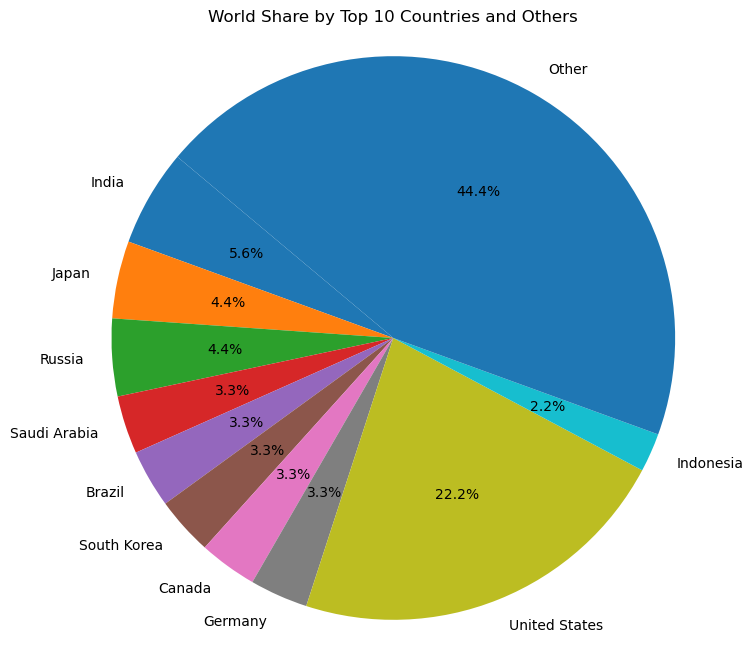

In [16]:
country_column = 'Country'
world_share_column = 'World Share'

# sorting the data by world share in descending order
df_sorted = df.sort_values(by=world_share_column, ascending=False)

# separating top 10 countries and the others
top_10 = df_sorted.head(10)
other = df_sorted.iloc[10:]

# converting the datatype of world share column into numeric so that it can be used in the charts
top_10['World Share'] = top_10['World Share'].str.rstrip('%').astype(float)
other['World Share'] = other['World Share'].str.rstrip('%').astype(float)

# adding the world share column for the other countries
other_share = other['World Share'].sum()

# creating separate dataframe for other countries, with label 'other' and thier total share
other_df = pd.DataFrame([[other_share, 'Other']], columns=[world_share_column, country_column])

# cancatenating the top 10 coutries and other category
top_10_with_other = pd.concat([top_10, other_df], ignore_index=True)

# creating the pie cahrt
plt.figure(figsize=(8, 8))
plt.pie(top_10_with_other[world_share_column], labels=top_10_with_other[country_column], autopct='%1.1f%%', startangle=140)
plt.title('World Share by Top 10 Countries and Others')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
